In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [14]:
wine = datasets.load_wine()

In [15]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [16]:
df = pd.DataFrame(wine["data"], columns = wine["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
df["target"] = wine["target"]

In [18]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
df.shape

(178, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [21]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [24]:
X = df
Y = X.pop("target")

# train test split

In [25]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [27]:
Y.unique()

array([0, 1, 2])

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
X_train.shape

(142, 13)

In [84]:
X_test.shape

(36, 13)

# K-NN classifier - Model Training

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

In [86]:
knn.fit(X_train, Y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
knn.score(X_test, Y_test)

0.8055555555555556

# Tuning Sensitivity of the model to "n_neighbors"

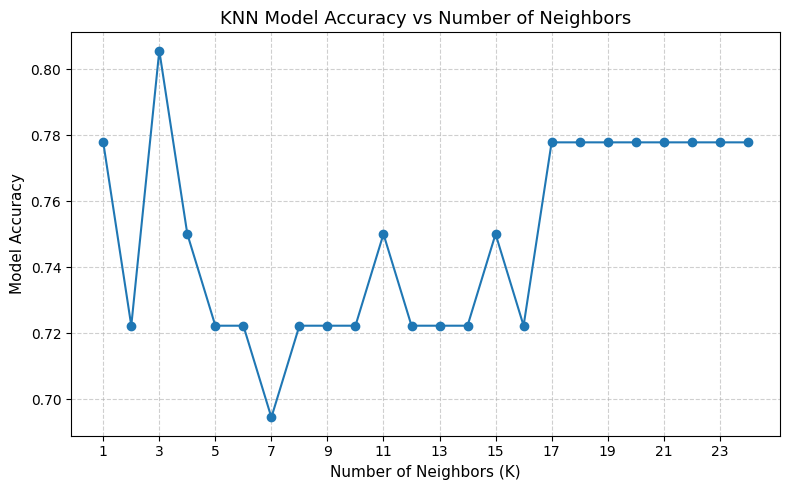

In [88]:
# Define range of K values
k_range = range(1, 25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    accuracy = knn.score(X_test, Y_test)
    scores.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (K)", fontsize=11)
plt.ylabel("Model Accuracy", fontsize=11)
plt.title("KNN Model Accuracy vs Number of Neighbors", fontsize=13)
plt.xticks(range(1, 25, 2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

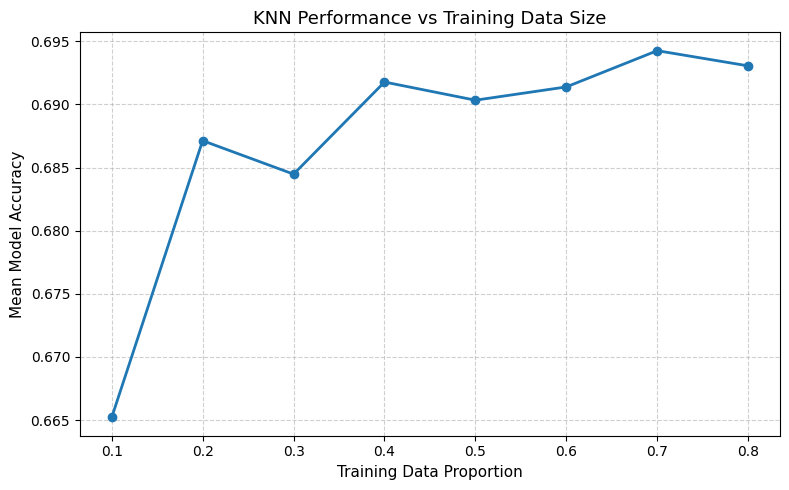

In [89]:
train_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
mean_accuracies = []

knn = KNeighborsClassifier(n_neighbors=5)

for train_size in train_sizes:
    scores = []

    for _ in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, train_size=train_size, random_state=None
        )
        knn.fit(X_train, Y_train)
        scores.append(knn.score(X_test, Y_test))

    mean_accuracies.append(np.mean(scores))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, mean_accuracies, marker='o', linewidth=2)
plt.xlabel("Training Data Proportion", fontsize=11)
plt.ylabel("Mean Model Accuracy", fontsize=11)
plt.title("KNN Performance vs Training Data Size", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# model prediction

In [90]:
pred = knn.predict(X_test)
pred

array([0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 2, 0])

In [91]:
Y_test

38     0
75     1
60     1
35     0
134    2
      ..
101    1
68     1
8      0
166    2
26     0
Name: target, Length: 161, dtype: int64

# Confusion matrix 

In [93]:
cm = confusion_matrix(Y_test, pred)

In [95]:
cm

array([[44,  0, 10],
       [ 2, 38, 25],
       [ 0, 14, 28]])

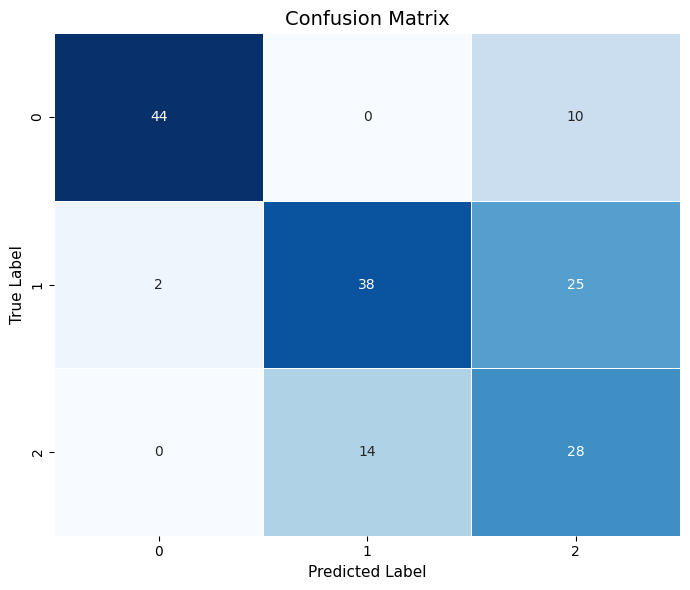

In [99]:
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    linewidths=0.5
)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)

plt.tight_layout()
plt.show()